In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Also needed for plt.title()

DESCRIPTIVE STATISTICS

In [ ]:
df=pd.read_csv("C:/Users/Student/Documents/kaim documents/week 1/raw_analyst_ratings.csv/raw_analyst_ratings.csv")
df['headline_length'] = df['headline'].str.len()
print(df['headline_length'].describe())

In [ ]:
sns.histplot(df['headline_length'], bins=30)
plt.title('Distribution of Headline Length')


In [ ]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))

In [ ]:
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Active Publishers')

In [ ]:
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')
df['day_of_week'] = df['date'].dt.day_name()

In [ ]:
df['date'].value_counts().sort_index().plot(figsize=(12,4))
plt.title('Number of Articles Over Time')

In [ ]:
df['day_of_week'].value_counts().plot(kind='bar')
plt.title('Articles by Day of the Week')


TEXT ANALYSIS

In [ ]:
%pip install nltk
import nltk
nltk.download('stopwords')


In [ ]:
%pip install gensim
import gensim
from gensim.utils import simple_preprocess

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess

stop_words = set(stopwords.words('english'))
def preprocess(text):
    return [word for word in simple_preprocess(text) if word not in stop_words]

df['tokens'] = df['headline'].apply(preprocess)



In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]


Time Series Analysis

Text(0.5, 1.0, 'Daily Publication Frequency')

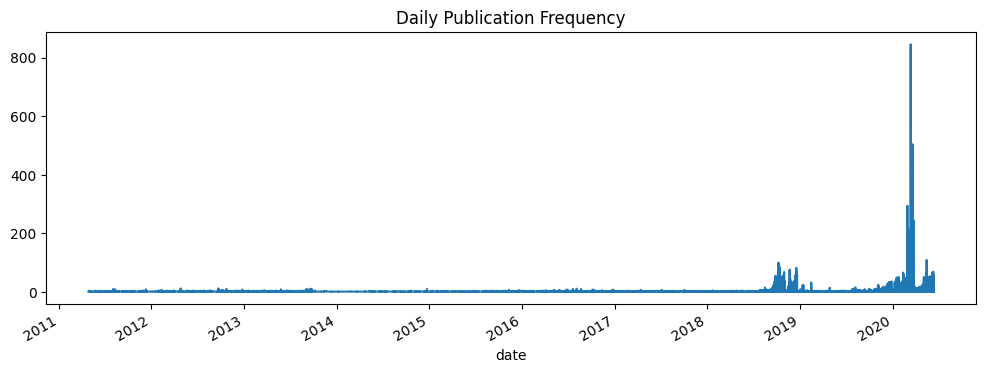

In [15]:
daily_counts = df['date'].value_counts().sort_index()
daily_counts.plot(figsize=(12,4))
plt.title('Daily Publication Frequency')

Text(0.5, 1.0, '7-Day Rolling Average of Publications')

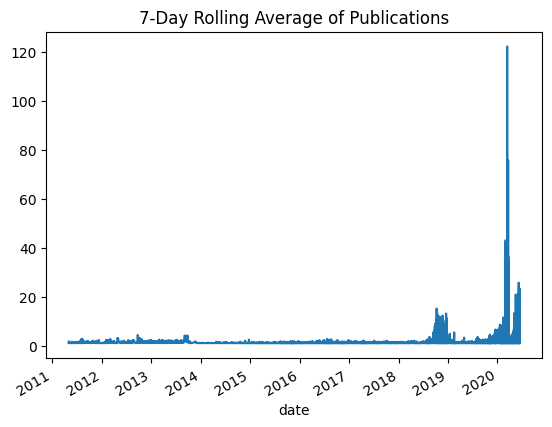

In [16]:
daily_counts.rolling(window=7).mean().plot()
plt.title('7-Day Rolling Average of Publications')


Text(0.5, 1.0, 'Articles Published by Hour')

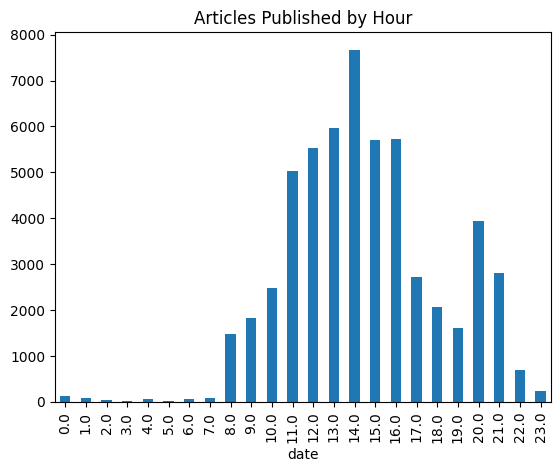

In [18]:
df['date'] = pd.to_datetime(df['date'], format='%H:%M:%S').dt.hour
df['date'].value_counts().sort_index().plot(kind='bar')
plt.title('Articles Published by Hour')
